## Load data

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

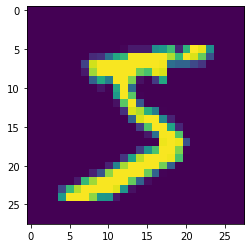

In [ ]:
plt.imshow(training_images[0])

In [ ]:
training_labels[0]

5

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
training_images[200].shape

(28, 28)

## Build model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D, BatchNormalization

In [ ]:
model = Sequential()

In [ ]:
shape = (28, 28, 1)

In [ ]:
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

## Data nomalization

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
training_images = training_images/255
training_images = training_images.reshape(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_images = test_images/255
test_images = test_images.reshape(10000, 28, 28, 1)

## Train model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(training_images, training_labels, epochs = 10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.1530 - acc: 0.9543 - val_loss: 0.0554 - val_acc: 0.9819
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0464 - val_acc: 0.9843
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0329 - acc: 0.9897 - val_loss: 0.0439 - val_acc: 0.9859
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0212 - acc: 0.9933 - val_loss: 0.0409 - val_acc: 0.9869
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0144 - acc: 0.9955 - val_loss: 0.0459 - val_acc: 0.9857
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0486 - val_acc: 0.9852
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0083 - acc: 0.9972 - val_loss: 0.0628 - val_acc: 0.9833
Epoch 8/10
1875/1875 [==============================] - 6s 3m

## Save model

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [21]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [22]:
model.save('model.h5')